In [1]:
!pip install nltk

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tag import pos_tag
import string
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

df = pd.read_excel('/Users/panjunyu/Desktop/Aibiz/data/QUE.xlsx')
df

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/panjunyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/panjunyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/panjunyu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Q
0,Can you provide a list of all property transac...
1,Have any PRC property developers recently acqu...
2,Which blue chip company recently acquired a si...
3,Can you provide a list of all transactions inv...
4,What significant transactions have been made b...
5,"Has Qingdao Port International Co., Ltd. annou..."
6,What were the significant transactions in the ...
7,What was the transaction announced by Affluent...
8,Which company's interest is being acquired by ...
9,Can you provide a list of all transactions tha...


In [4]:
stop_words = set(stopwords.words('english'))

def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [5]:
keywords = []

for question in df['Q']:
    question_no_punct = remove_punctuation(question) 
    tokens = word_tokenize(question_no_punct) 
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words] 
    filtered_tokens = filtered_tokens[:3]
    keywords.append(" ".join(filtered_tokens))

In [6]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(keywords)

In [7]:
feature_names = vectorizer.get_feature_names()
scores = tfidf_matrix.toarray().tolist()
all_scores = [score for score_list in scores for score in score_list]

/Users/panjunyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


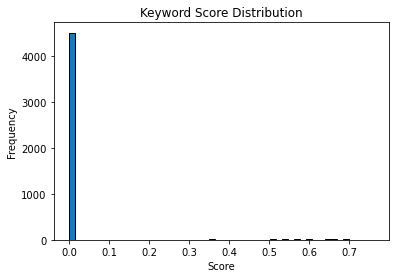

In [8]:
plt.hist(all_scores, bins=50, edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Keyword Score Distribution')

plt.show()

In [9]:
filtered_keywords = []

for i, score_list in enumerate(scores):
    keywords_with_scores = [(feature_names[j], score) for j, score in enumerate(score_list)]
    filtered_keywords.append([keyword for keyword, score in keywords_with_scores if score > 0.2])


In [10]:
result_df = pd.DataFrame({'Question': df['Q'], 'Keywords': filtered_keywords})
result_df

,Question,Keywords
0,Can you provide a list of all property transac...,"[list, property, provide]"
1,Have any PRC property developers recently acqu...,"[developers, prc, property]"
2,Which blue chip company recently acquired a si...,"[blue, chip, company]"
3,Can you provide a list of all transactions inv...,"[list, provide, transactions]"
4,What significant transactions have been made b...,"[made, significant, transactions]"
5,"Has Qingdao Port International Co., Ltd. annou...","[international, port, qingdao]"
6,What were the significant transactions in the ...,"[mainland, significant, transactions]"
7,What was the transaction announced by Affluent...,"[affluent, announced, transaction]"
8,Which company's interest is being acquired by ...,"[acquired, companys, interest]"
9,Can you provide a list of all transactions tha...,"[list, provide, transactions]"


In [11]:
result_df.to_excel('/Users/panjunyu/Desktop/Aibiz/data/k_3.xlsx', index=False)

print("Done")

Done
